# DCGAN
### This notebook contains an implementation of the model described [here](https://arxiv.org/abs/1511.06434)

## Notebook resources

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')
  

Thu Oct 27 17:34:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Defining constants

In [2]:
len_seed = 4 # How many elements in seed vector, 100 was used in DCGAN paper

## Loading and preprocessing MNIST

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

### Loading data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

training_data = np.concatenate((X_train, X_test))

print(f'training_data shape: {training_data.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
training_data shape: (70000, 28, 28)
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Preprocessing


* Reshape the dataset to (70000, 28, 28, 1)
 * 70,000 images with a size of 28x28 and 1 color channel



In [5]:
training_data = training_data / 127.5 - 1 # Normalize the images
training_data = np.reshape(training_data, (-1, 28, 28, 1))
np.random.shuffle(training_data) # Randomize order of images
training_data.shape

(70000, 28, 28, 1)

### Training image preview

In [ ]:
def display_images(images):
  # Max number of images is 24
  if len(images) > 24:
    return

  fig = plt.figure(figsize=(8,8))
  columns = 6
  rows = 4
  for i in range(len(images)):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(images[i].reshape(28,28))

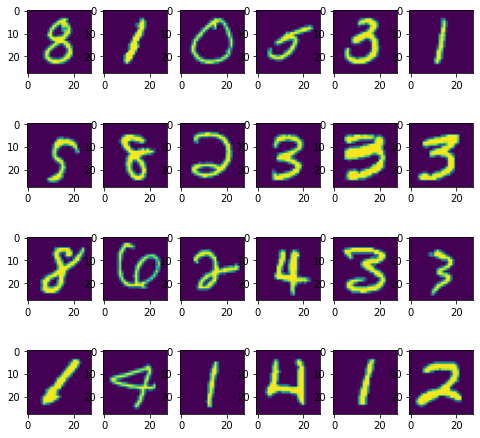

In [ ]:
display_images(training_data[:24])

## Imports for building models

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, Flatten, Dropout, LeakyReLU, BatchNormalization, ZeroPadding2D

## Model Utils

In [ ]:
def get_num_conv_layers(output_width, output_height)

## Building toy model

In [ ]:
def build_generator(num_color_channels=1):
    print(num_color_channels)
    generator = Sequential([
      Dense(7*7*256, activation='relu',input_dim=len_seed), # Initial flat hidden layer
      Reshape((7, 7, 256)), # Reshape to 7x7x256 i.e. a 7x7 image with 256 filters

      UpSampling2D(), # Doubles the resolution of the representation (from 7x7x256 to 14x14x256)
      Conv2D(256, kernel_size=3, padding='same', activation='relu'),

      UpSampling2D(), # 28x28x128
      Conv2D(128, kernel_size=3, padding='same', activation='relu'),

      Conv2D(num_color_channels, kernel_size=3, padding='same') # Combine/Process 128 filters into 1 color channel
    ])

    return generator

def build_discriminator():
  image_shape = (28, 28, 1)

  discriminator = Sequential([
    Conv2D(32, kernel_size=3, input_shape=image_shape, padding='same', activation='relu'),
    Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(512, kernel_size=3, padding='same', activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
  ])

  return discriminator

## Building DCGAN model

In [1]:
import math

math.gcd(28, 28)

28

In [ ]:


def build_generator(num_color_channels=1, output_width, output_height):
  num_conv_layer = get_num_conv_layers(output_width, output_height)

  generator = Sequential([
      Dense(7*7*256, activation='relu',input_dim=len_seed),
      Reshape((7, 7, 256)), # 7x7

      Conv2D(128, kernel_size=3, padding='same'),
      BatchNormalization(momentum=0.8),
      LeakyReLU(alpha=0),
      UpSampling2D(), # 14x14

      Conv2D(64, kernel_size=3, padding='same'),
      BatchNormalization(momentum=0.8),
      LeakyReLU(alpha=0),
      UpSampling2D(), # 28x28

      Conv2D(num_color_channels, kernel_size=3, padding='same')
  ])
  
  return generator
  
def build_discriminator():
  image_shape = (28, 28, 1)
  discriminator = Sequential([
      Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding='same'),
      LeakyReLU(alpha=0.2),
      Dropout(0.25),

      Conv2D(64, kernel_size=3, strides=2, padding='same'),
      BatchNormalization(momentum=0.8),
      LeakyReLU(0.2),
      Dropout(0.25),

      Conv2D(128, kernel_size=3, strides=2, padding='same'),
      BatchNormalization(momentum=0.8),
      LeakyReLU(0.2),
      Dropout(0.25),

      Conv2D(256, kernel_size=3, strides=2, padding='same'),
      BatchNormalization(momentum=0.8),
      LeakyReLU(0.2),
      Dropout(0.25),

      Flatten(),
      Dense(1, activation='sigmoid')
  ])

  return discriminator



## Initialize GAN

In [ ]:
generator = build_generator(num_color_channels=1)
discriminator = build_discriminator()

1


## Test Generator output

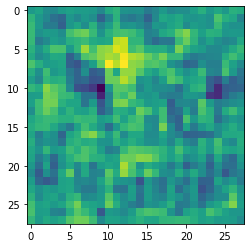

In [ ]:
input_noise = tf.random.normal([1, len_seed])
generated_image = generator(input_noise, training=False)
plt.imshow(tf.reshape(generated_image, (28, 28)))

## Test Discriminator output

In [ ]:
decision = discriminator(generated_image)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.49996203]], dtype=float32)>

## Model summaries

### Generator summary

In [ ]:
generator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12544)             62720     
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 256)       590080    
                                                                 
 up_sampling2d_7 (UpSampling  (None, 28, 28, 256)      0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 128)      

### Discriminator summary

In [ ]:
discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 512)       1180160   
                                                                 
 flatten_3 (Flatten)         (None, 401408)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                

## Loss Functions

### Imports

In [ ]:
from typing import BinaryIO
from tensorflow.keras.losses import BinaryCrossentropy

### Generator loss

In [ ]:
binary_cross_entropy = BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(y_pred_fake):
  return binary_cross_entropy(tf.ones_like(y_pred_fake), y_pred_fake)

### Discriminator loss

In [ ]:
def discriminator_loss(y_pred_real, y_pred_fake):
  real_loss = binary_cross_entropy(tf.ones_like(y_pred_real), y_pred_real)
  fake_loss = binary_cross_entropy(tf.zeros_like(y_pred_fake), y_pred_fake)
  return real_loss + fake_loss

## Optimizers

### Imports

In [ ]:
from tensorflow.keras.optimizers import Adam

### Generator optimizer

In [ ]:
generator_optimizer = Adam(0.0002, 0.5) # Recommended values from DCGAN paper

### Discriminator optimizer

In [ ]:
discriminator_optimizer = Adam(0.0002, 0.5)

## Set up checkpoint

In [ ]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Training function

### Imports

In [ ]:
import time
from IPython import display

### Training function definitions

In [ ]:
# @tf.function
def train_step(real_image_batch, batch_size):
  input_noise_seeds = tf.random.normal([batch_size, len_seed])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_image_batch = generator(input_noise_seeds, training=True)

    y_pred_real = discriminator(real_image_batch, training=True)
    y_pred_fake = discriminator(generated_image_batch, training=True)

    gen_loss = generator_loss(y_pred_fake)
    disc_loss = discriminator_loss(y_pred_real, y_pred_fake)

    print(f'Generator loss: {gen_loss}, Discriminator loss: {disc_loss}', end='\r')

    generator_gradient = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradient, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradient, discriminator.trainable_variables))

    return gen_loss, disc_loss


In [ ]:
def train(dataset, epochs, batch_size, num_test_seeds):
  if not (len(dataset) / batch_size).is_integer():
    print('Batch size not compatible with dataset size')
    return

  if num_test_seeds < 1:
    print('Number of test seeds invalid (must be > 0)')
    return
  
  test_seeds = tf.random.normal([num_test_seeds, len_seed])

  # Assumes that the dataset has already been preprocessed
  # Expected dataset shape (num_instances, width, height, color_channels)
  num_images = len(dataset)

  for epoch in range(epochs):
    
    start = time.time()
    gen_loss, disc_loss = None, None
    for i in range(len(dataset)//batch_size):
      display.clear_output(wait=True)
      real_image_batch = dataset[i * batch_size : (i + 1) * batch_size]
      print(f'Loss for previous batch #{i}: Generator loss = {gen_loss}, Discriminator loss = {disc_loss}')
      print(f'Epoch # {epoch + 1}/{epochs}')
      print(f'Batch # {i}/{len(dataset)//batch_size}')
      gen_loss, disc_loss = train_step(real_image_batch, batch_size)
      
    generate_and_save_images(generator, epoch + 1, test_seeds)

    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

    print(f'Time for epoch {epoch + 1} is {time.time()-start} sec')
  
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, test_seeds)

In [ ]:
def generate_and_save_images(model, epoch, test_seeds):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_seeds, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Training the model

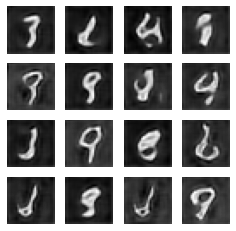

Total training time (in seconds): 40.62494087219238


In [ ]:
start = time.time()
train(training_data, epochs=1, batch_size=125, num_test_seeds=16)
end = time.time()
print(f'Total training time (in seconds): {end - start}')

In [ ]:
training_data.shape

(70000, 28, 28, 1)

In [ ]:
generator.predict(tf.random.normal([4,]))

ValueError: ignored

## Saving the model

In [ ]:
generator.save('./models/generator')

In [ ]:
discriminator.save('./models/discriminator')

## Download folder

In [ ]:
!tar cvf toy_model_batch_processing.tgz toy_model_batch_processing/

tar: toy_model_batch_processing: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [ ]:
!tar cvf generator.tgz ./models/generator

./models/generator/
./models/generator/keras_metadata.pb
./models/generator/assets/
./models/generator/variables/
./models/generator/variables/variables.index
./models/generator/variables/variables.data-00000-of-00001
./models/generator/saved_model.pb
